In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize
from scipy.stats import rv_discrete
import functools


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.array(range(500))
y = 0.5 * x + 1 + np.random.normal(scale = 0.2, size=500)

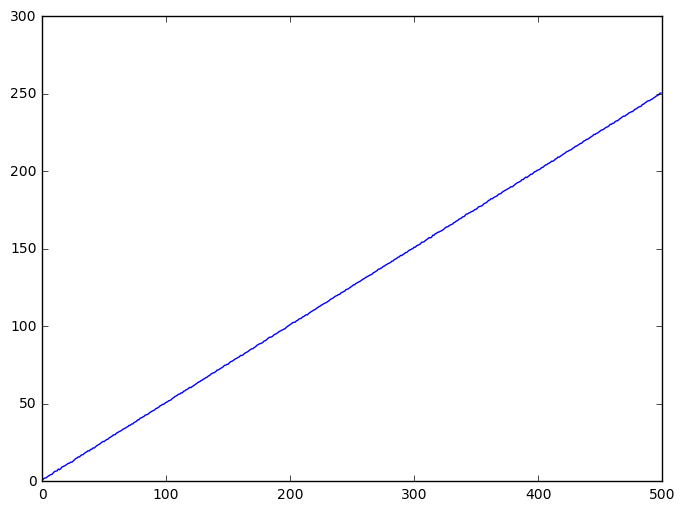

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(x, y)

In [18]:
def mse(x, y, params):
    return np.sum((y - (params[0] * x + params[1])) ** 2)
mse500 = lambda p: mse(x, y, p)
res = minimize(mse500, [0.5, 2])
print res.x
res = minimize(mse500, [0, 0])
print res.x
res = minimize(mse500, [123, 0])
print res.x

[ 0.49993839  1.00009993]
[ 0.49993837  1.00010741]
[ 0.49993837  1.00010709]


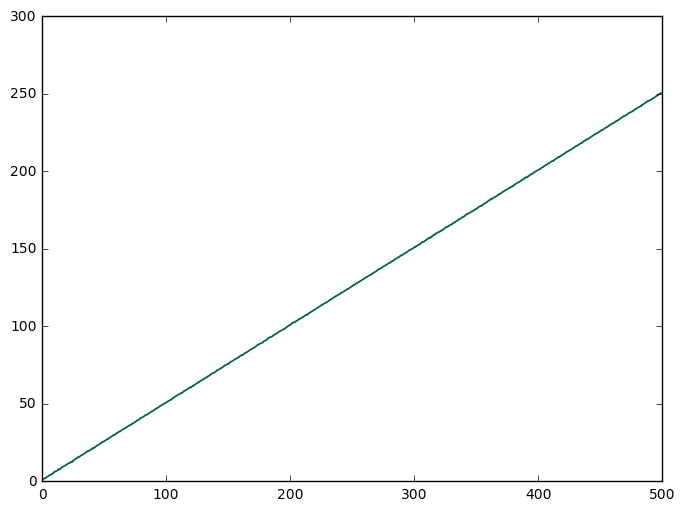

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.plot(x, res.x[0] * x + res.x[1], color='green')

In [6]:

x_new = np.append(x, rv_discrete(values=(range(500), [1./500] * 500)).rvs(size=75))
y_new = np.append(y, -1 + np.random.normal(scale = 0.2, size=75))
print len(x_new), len(y_new)

575 575


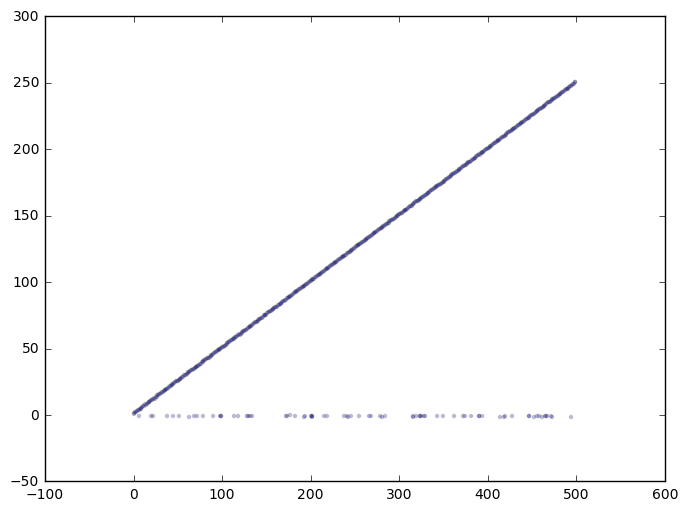

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, alpha=0.2, s=5)

In [17]:
# не заюзал sklearn sorry, ниже заюзаю для MAE
def mse(x, y, params):
    return np.sum((y - (params[0] * x + params[1])) ** 2)
mse575 = lambda p: mse(x_new, y_new, p)
res = minimize(mse575, [0.5, 2])
print res.x
res = minimize(mse575, [0, 0])
print res.x
res = minimize(mse575, [123, 2])
print res.x

[ 0.42821698  1.6371874 ]
[ 0.42821686  1.63723133]
[ 0.42821689  1.63721961]


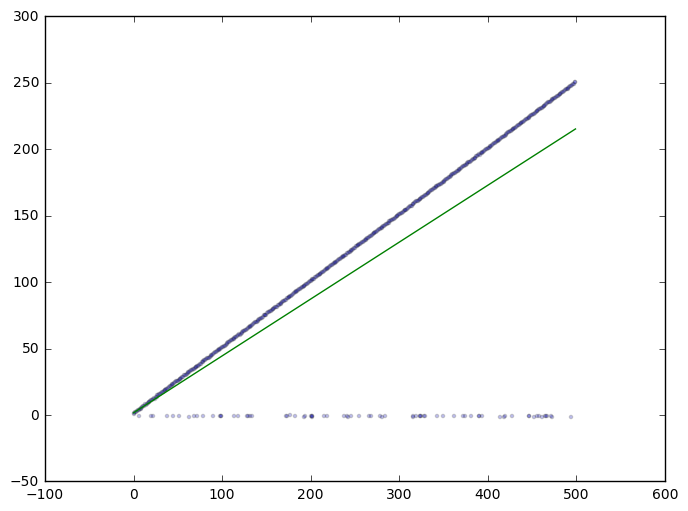

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, s=5, alpha=0.2)
plt.plot(x, res.x[0] * x + res.x[1], color='green')

In [20]:
from sklearn.metrics import mean_absolute_error
# а тут заюзаю
mae575 = lambda p: mean_absolute_error(y_new, x_new * p[0] + p[1])
res = minimize(mae575, [0.5, 2])
print res.x
res = minimize(mae575, [0, 0])
print res.x
res = minimize(mae575, [213, 2])
print res.x

[ 0.49982578  1.00416861]
[ 0.49983263  1.00269484]
[ 0.49983275  1.00266989]


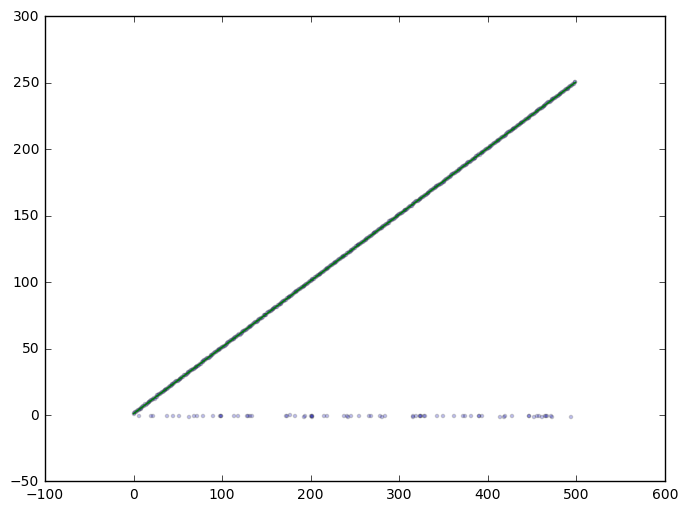

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, s=5, alpha=0.2)
plt.plot(x, res.x[0] * x + res.x[1], color='green')

посчитаем breakdown point - "максимальная доля объектов, которые можно выставить произвольно, так чтобы нельзя было сделать оценку произвольно плохой"
для mae: 
возьмем "меньшенство" (округление_вниз [(n-1) / 2]) объектов устремим их(реализации) к бесконечности, при этом медиана останется в "большинстве" объектов. Тогда при стремлении к бесконечности n получим breakdown_point=1/2
для mse:
для среднего даже устремив один объект можно сделать среднее сколь угодно большим. поэтому breakdow_point = lim_{n->inf} 1/n = 0
видим, что breakdown для mae > breakdown для mse. Значит mae более устойчива к выбросам.